In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC, LinearSVC, LinearSVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Pipeline
from sklearn.pipeline import make_pipeline


In [2]:
#read pre-processed data 
df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage4.csv")

#show head 
df.head()

,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,...,Sector_Mining,Sector_Other Services,Sector_Professional Services,Sector_Public Admin,Sector_Real Estate,Sector_Retail Trade,Sector_Transportation,Sector_Unknown,Sector_Utilities,Sector_Wholesale Trade
0,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,7-Feb-06,2006,162,2,...,False,False,False,False,False,True,False,False,False,False
1,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,7-Feb-06,2006,126,7,...,False,False,False,False,False,False,False,False,False,False
2,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,7-Feb-06,2006,83,18,...,False,False,False,False,False,False,False,False,False,False
3,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,7-Feb-06,2006,84,4,...,False,False,False,False,False,False,False,False,False,False
4,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,7-Feb-06,2006,60,3,...,False,False,False,False,True,False,False,False,False,False


### size check 

In [3]:
df.shape

(572333, 46)

### Descriptives 

a) Numeric descriptive statistics

In [28]:
#get description of the data 
df.describe(include='all')


,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,...,Sector_Mining,Sector_Other Services,Sector_Professional Services,Sector_Public Admin,Sector_Real Estate,Sector_Retail Trade,Sector_Transportation,Sector_Unknown,Sector_Utilities,Sector_Wholesale Trade
count,572333,572333,572333,572333.000000,572333,572333,572333,572333.000000,572333.000000,572333.000000,...,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,NaN,4599,55,4907,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,937,8412,82707,NaN,68797,78333,981,NaN,NaN,NaN,...,571156,518318,517442,572235,560509,474753,551563,549492,571880,537222
mean,NaN,NaN,NaN,52526.476848,NaN,NaN,NaN,2004.824689,96.625847,8.801560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,31533.588428,NaN,NaN,NaN,2.982871,70.744067,43.751445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1994.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,22480.000000,NaN,NaN,NaN,2003.000000,60.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,54112.000000,NaN,NaN,NaN,2005.000000,84.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,83713.000000,NaN,NaN,NaN,2007.000000,102.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


i. Summary of numeric variables 

In [29]:
#get summary of the numeric variables 
df.describe()

,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_binary,UrbanRural_binary,MIS_Status_Binary,IsFranchise,LowDoc_binary,RevLineCr_binary
count,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,5.723330e+05,5.723330e+05,5.723330e+05,5.723330e+05,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000
mean,52526.476848,2004.824689,96.625847,8.801560,1.285879,2.424426,5.958591,1.928716e+05,1.702337e+04,1.785447e+05,1.352192e+05,0.241809,0.183114,0.765161,0.055803,0.074114,0.334014
std,31533.588428,2.982871,70.744067,43.751445,0.453835,13.775755,24.015743,3.094678e+05,7.365140e+04,3.027037e+05,2.487573e+05,0.428179,0.386760,0.423898,0.229541,0.261957,0.471645
min,0.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000e+00,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22480.000000,2003.000000,60.000000,2.000000,1.000000,0.000000,0.000000,3.500000e+04,0.000000e+00,2.500000e+04,1.300000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54112.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,2.000000,8.000000e+04,0.000000e+00,6.000000e+04,3.750000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,83713.000000,2007.000000,102.000000,8.000000,2.000000,2.000000,6.000000,2.000000e+05,0.000000e+00,1.800000e+05,1.275000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,99999.000000,2014.000000,569.000000,8000.000000,2.000000,5085.000000,9500.000000,1.144632e+07,2.223766e+06,5.472000e+06,5.472000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ii. Summary for categorical variables 

In [30]:
#summary of categorical variables 
df.describe(include=[object])

,Name,City,State,Bank,BankState,ApprovalDate,DisbursementDate,BalanceGross
count,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,4599,55,4907,2851,14
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,31-Mar-06,$0.00
freq,937,8412,82707,68797,78333,981,6938,572320


b. Graphical descriptions

i) Histogram for numeric values 


array([[<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'ApprovalFY'}>,
        <Axes: title={'center': 'Term'}>,
        <Axes: title={'center': 'NoEmp'}>],
       [<Axes: title={'center': 'NewExist'}>,
        <Axes: title={'center': 'CreateJob'}>,
        <Axes: title={'center': 'RetainedJob'}>,
        <Axes: title={'center': 'DisbursementGross'}>],
       [<Axes: title={'center': 'ChgOffPrinGr'}>,
        <Axes: title={'center': 'GrAppv'}>,
        <Axes: title={'center': 'SBA_Appv'}>,
        <Axes: title={'center': 'ChgOffDate_binary'}>],
       [<Axes: title={'center': 'UrbanRural_binary'}>,
        <Axes: title={'center': 'MIS_Status_Binary'}>,
        <Axes: title={'center': 'IsFranchise'}>,
        <Axes: title={'center': 'LowDoc_binary'}>],
       [<Axes: title={'center': 'RevLineCr_binary'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

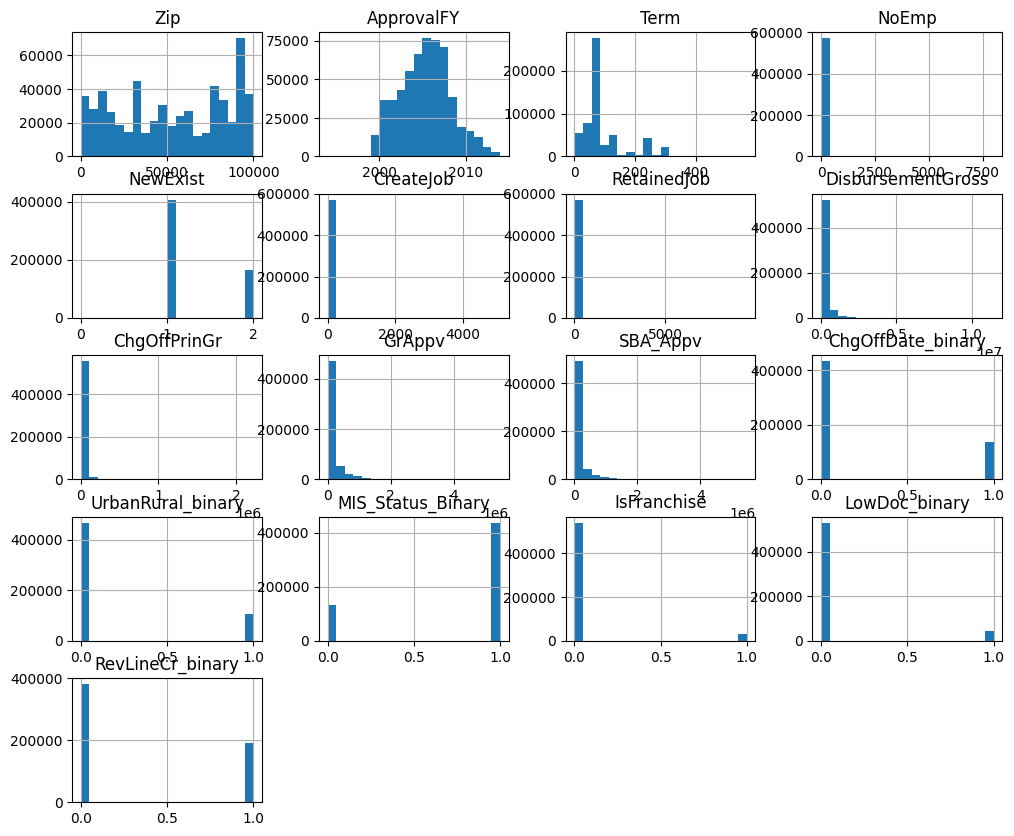

In [6]:
#create a histogram for bumeric variables with bins of 20 
df.hist(figsize=(12, 10), bins=20)

ii. Historgram of Loan approval by year

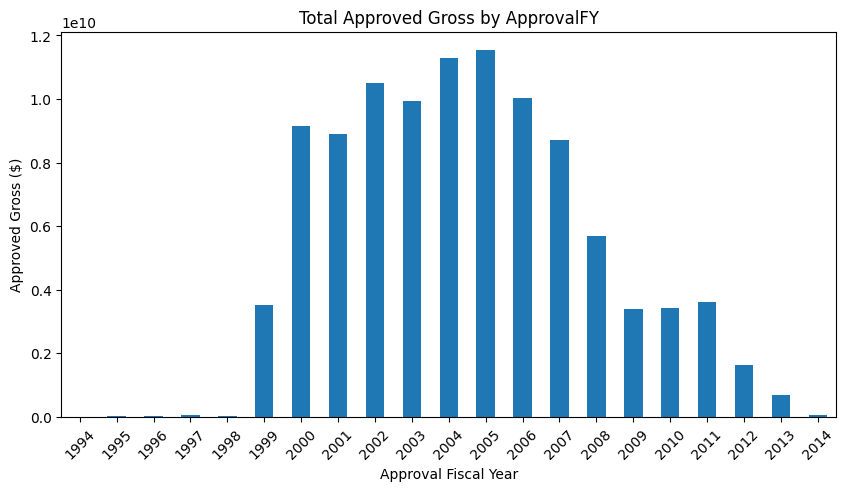

In [7]:
 # Ensure ApprovalFY is numeric
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')

# Drop any NaN values that might have been introduced during conversion
df = df.dropna(subset=['ApprovalFY'])

# Aggregate and plot
df.groupby('ApprovalFY')['GrAppv'].sum().plot(kind='bar', figsize=(10, 5))

plt.xlabel("Approval Fiscal Year")
plt.ylabel("Approved Gross ($)")
plt.title("Total Approved Gross by ApprovalFY")
plt.xticks(rotation=45)
plt.show()

The peak of loan approval was 2005

iii. Histogram of loan disbursement by year

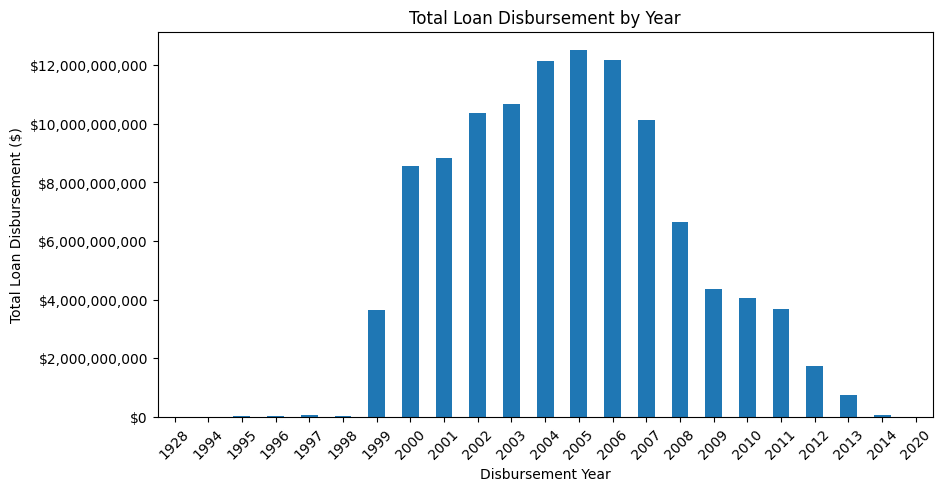

In [8]:
# Extract the last two digits (year) from DisbursementDate and convert to integer
df['DisbursementYear'] = df['DisbursementDate'].str[-2:].astype(int)

# Fix potential century issue: Convert 00-23 to 2000-2023, and 80-99 to 1980-1999
df['DisbursementYear'] = df['DisbursementYear'].apply(lambda x: x + 2000 if x < 24 else x + 1900)

# Aggregate total disbursement by year
yearly_disbursement = df.groupby('DisbursementYear')['DisbursementGross'].sum()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
yearly_disbursement.plot(kind='bar', ax=ax)

# Formatting
ax.set_xlabel("Disbursement Year")
ax.set_ylabel("Total Loan Disbursement ($)")
ax.set_title("Total Loan Disbursement by Year")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format as dollars
plt.xticks(rotation=45)

plt.show()

The peak of loan disbursement year was 2005 matching the year that had the highest loan approval 

Box plots for outliers and distributions 

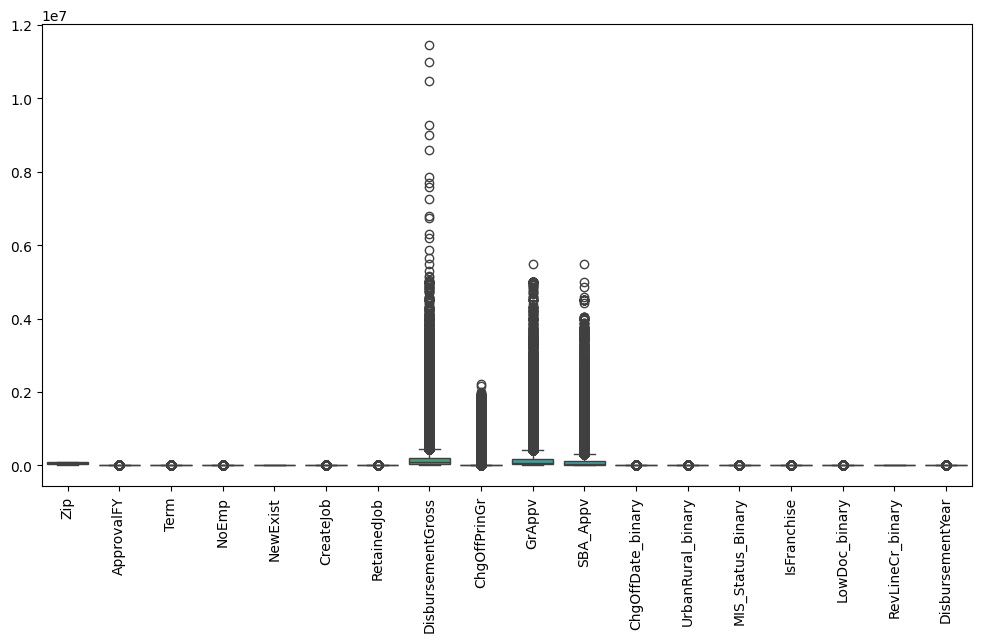

In [9]:
#box plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()


Disbursement gross has a six outliers, GrAppc and SBA_appv only have 1 each. The rest of the dataset has no noticeable outliers

Check current columns

In [10]:
#check columns 
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'ChgOffDate_binary', 'UrbanRural_binary',
       'MIS_Status_Binary', 'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
       'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
       'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
       'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
       'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
       'Sector_Mining', 'Sector_Other Services',
       'Sector_Professional Services', 'Sector_Public Admin',
       'Sector_Real Estate', 'Sector_Retail Trade', 'Sector_Transportation',
       'Sector_Unknown', 'Sector_Utilities', 'Sector_Wholesale Trade',
       'DisbursementYear'],
      dtype='object')

### size check 

In [4]:


df.shape

(572333, 46)

## 1. Continuous Variables 

### A. Predicting Gross Approved Loan (GrAppv) 

This section uses four models—Logistic Regression, Random Forest, XGBoost, and SVM—to predict the gross approved loan. The target variable is GRAppv.

i) Linear Regression

In [33]:
#set features and target 
features = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'ChgOffPrinGr', 'SBA_Appv', 
            'ChgOffDate_binary', 'UrbanRural_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

X = df[features]
y = df['GrAppv']

#Split into 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split train_val into 87.5% train, 12.5% val ( to achieve 70% train, 10% val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

#Scale features for standardization 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Fit Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict
y_train_pred = lin_reg.predict(X_train_scaled)
y_val_pred = lin_reg.predict(X_val_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Evaluate
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.2f}, R²: {r2:.4f}")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")

Train MSE: 1989391154.14, R²: 0.9783
Validation MSE: 1794591167.47, R²: 0.9802
Test MSE: 1981584865.49, R²: 0.9785


ii) Random Forest 

In [12]:
# Train Random Forest Regressor with scaled data
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)
# Use scaled features
rf_model.fit(X_train_scaled, y_train)  

# Predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model performance
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print results
print(f"Random Forest Train MSE: {train_mse_rf:.4f}, R²: {train_r2_rf:.4f}")
print(f"Random Forest Validation MSE: {val_mse_rf:.4f}, R²: {val_r2_rf:.4f}")
print(f"Random Forest Test MSE: {test_mse_rf:.4f}, R²: {test_r2_rf:.4f}")


Random Forest Train MSE: 129422729.8295, R²: 0.9986
Random Forest Validation MSE: 246892299.9305, R²: 0.9973
Random Forest Test MSE: 259425575.0244, R²: 0.9972


iii) XG Boost

In [13]:

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=50, random_state=42, eval_metric="rmse", n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Train MSE: 1075209796.1439, R²: 0.9883
Validation MSE: 1834541327.1724, R²: 0.9798
Test MSE: 1923854431.4823, R²: 0.9791


iv) Support Machine Vectors 

In [14]:
# Create a pipeline with StandardScaler, PCA, and LinearSVR
svr_pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),  # Retain 95% of variance
    LinearSVR(random_state=42, max_iter=10000)
)

# Fit model on training data
svr_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = svr_pipeline.predict(X_train)
y_val_pred = svr_pipeline.predict(X_val)
y_test_pred = svr_pipeline.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Train MSE: 21029628772.2606, R²: 0.7705
Validation MSE: 20930006005.8791, R²: 0.7696
Test MSE: 21209814478.5109, R²: 0.7695


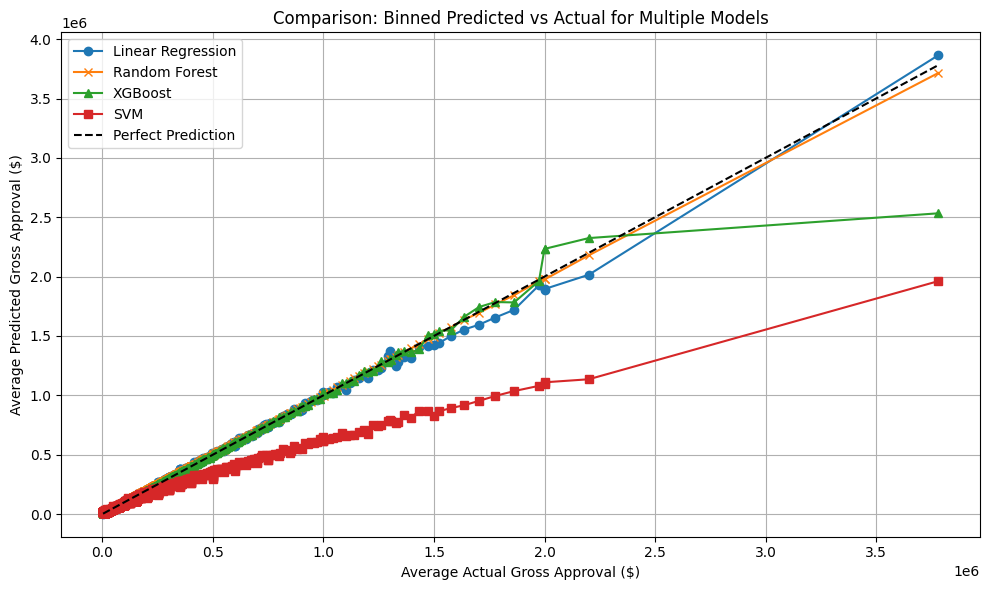

In [15]:
# Predictions for each model
y_test_pred_lin = lin_reg.predict(X_test_scaled)          # Linear Regression (trained on scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)          # Random Forest (trained on scaled)
y_test_pred_xgb = xgb_model.predict(X_test)               # XGBoost (trained on unscaled)
y_test_pred_svr = svr_pipeline.predict(X_test)            # SVM pipeline handles scaling

# Store predictions in a DataFrame
df_plot_multi = pd.DataFrame({
    'Actual': y_test.values,
    'LinearReg': y_test_pred_lin,
    'RandomForest': y_test_pred_rf,
    'XGBoost': y_test_pred_xgb,
    'SVM': y_test_pred_svr
})

# Sort and bin by actual values
df_plot_multi = df_plot_multi.sort_values(by='Actual').reset_index(drop=True)
df_plot_multi['bin'] = df_plot_multi.index // 100  # 100 observations per bin

# Group by bin and compute mean
df_binned_multi = df_plot_multi.groupby('bin').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_binned_multi['Actual'], df_binned_multi['LinearReg'], label='Linear Regression', linestyle='-', marker='o')
plt.plot(df_binned_multi['Actual'], df_binned_multi['RandomForest'], label='Random Forest', linestyle='-', marker='x')
plt.plot(df_binned_multi['Actual'], df_binned_multi['XGBoost'], label='XGBoost', linestyle='-', marker='^')
plt.plot(df_binned_multi['Actual'], df_binned_multi['SVM'], label='SVM', linestyle='-', marker='s')
plt.plot(df_binned_multi['Actual'], df_binned_multi['Actual'], linestyle='--', color='black', label='Perfect Prediction')

# Labels and title
plt.xlabel('Average Actual Gross Approval ($)')
plt.ylabel('Average Predicted Gross Approval ($)')
plt.title('Comparison: Binned Predicted vs Actual for Multiple Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Random forest and linear regressions were the closest models to match the perfect prediction 

### B. Predicting the Amount of Charged-Off Principal

Understanding what factors contribute to larger charge-offs can help refine lending policies.

In [35]:
df.shape

(572333, 46)

In [5]:
# Define features and target variable
features = ['NoEmp', 'NewExist', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

X = df[features]
y = df['ChgOffPrinGr']

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)


i) Linear Regression as base model 

In [37]:
# Standardize the features (Linear Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Train MSE: 3951924938.0516, R²: 0.2622
Validation MSE: 4257093285.2348, R²: 0.2606
Test MSE: 4052395221.0307, R²: 0.2626


ii) Random Forest 

In [38]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


Train RMSE: 13003.0535, R²: 0.9684
Validation RMSE: 32454.0521, R²: 0.8171
Test RMSE: 29366.0614, R²: 0.8431


iii) XG Boost

Use XGBoost Regressor because 'ChgOffPrinGr' is a continuous variable 

In [39]:
# Train XGBoost model (regression)
xgb_model = XGBRegressor(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Train MSE: 545313973.2197, R²: 0.8982
Validation MSE: 1000066416.2729, R²: 0.8263
Test MSE: 752650245.9733, R²: 0.8630


iv) SVM

Since SVM is computationally expensive, I will sub-sample 2% of the dataset and gauge its performance. 

In [9]:
# Subsample 10% of the training data
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.02, random_state=42, shuffle=True)

# Standardize the features
scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM model
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_sub_scaled, y_train_sub)

# Predictions
y_train_pred = svm_model.predict(X_train_sub_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train_sub, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train_sub, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Train MSE: 10889396403.4802, R²: -0.7378
Validation MSE: 11950641000.6477, R²: -1.0756
Test MSE: 11890937938.6569, R²: -1.1637


### Comparison of Model Performance 

In [10]:
# Create a dictionary of results
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Linear SVM (10%)'],
    'Train MSE': [4222554684.93, 13122.5781, 238522649.4237, 10889396403.4802],
    'Train R²': [0.2544, 0.9696, 0.9579, -0.7378],
    'Val MSE': [3914276643.5948, 35667.8978, 1185831992.6504, 11950641000.6477],
    'Val R²': [0.2850, 0.7676, 0.7834, -1.0756],
    'Test MSE': [4280889619.9658, 32811.5325, 1090246310.4710, 11890937938.6569],
    'Test R²': [0.2639, 0.8149, 0.8125, -1.1637]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display it
results_df


,Model,Train MSE,Train R²,Val MSE,Val R²,Test MSE,Test R²
0,Linear Regression,4.222555e+09,0.2544,3.914277e+09,0.2850,4.280890e+09,0.2639
1,Random Forest,1.312258e+04,0.9696,3.566790e+04,0.7676,3.281153e+04,0.8149
2,XGBoost,2.385226e+08,0.9579,1.185832e+09,0.7834,1.090246e+09,0.8125
3,Linear SVM (10%),1.088940e+10,-0.7378,1.195064e+10,-1.0756,1.189094e+10,-1.1637


The overall best perfomer is XG Boost followed by Random Forest. The poorest perfomer is SVM. There is likelihood that additional performance improvement could be achieved by giving SVM more training data, however, I am not sure if it is worth the compuattional expense given that Random Forest and XGBoost captured 81% of variation in the dataset at a fraction of the computational need. 

### Visual Presentation of Actual vs Multiple Model Predictions 

## May need to be removed if graphing issue is not resolved 

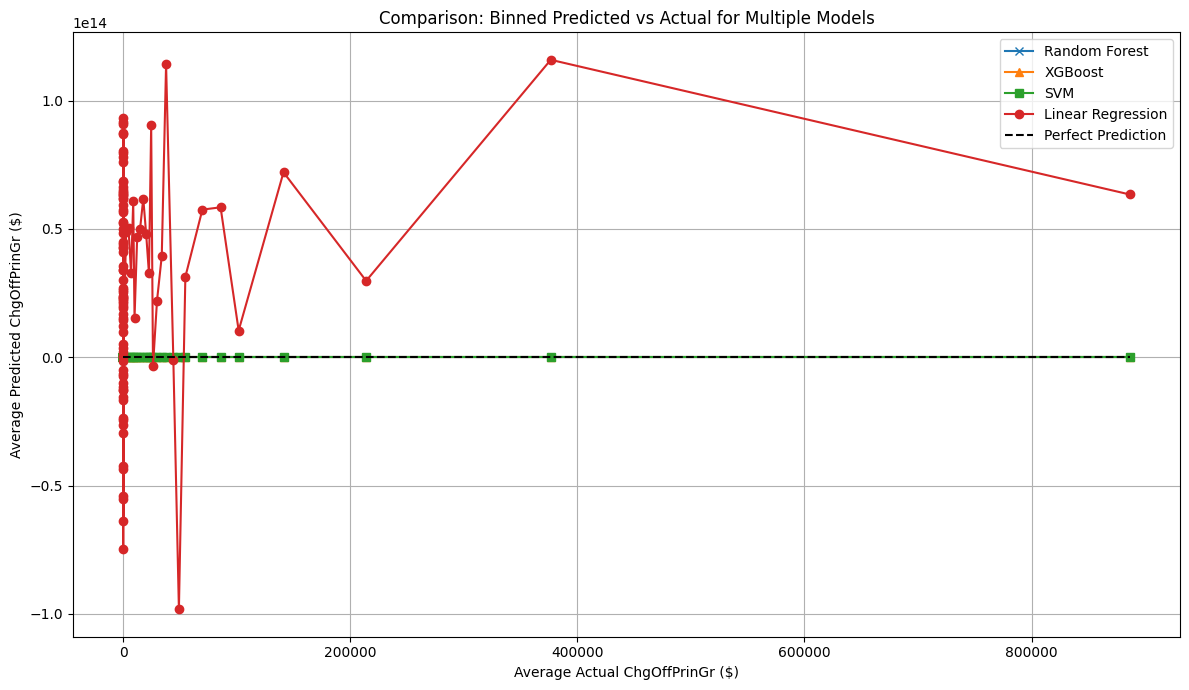

In [8]:
# Get predictions for each model
y_test_pred_rf = rf_model.predict(X_test)                # RandomForestRegressor
y_test_pred_xgb = xgb_model.predict(X_test)              # XGBoost Regressor
y_test_pred_svm = svm_model.predict(X_test_scaled)       # SVM predictions using scaled data
y_test_pred_lr = lr_model.predict(X_test_scaled)         # Linear Regression predictions using scaled data

# Store predictions in a DataFrame
df_plot_multi = pd.DataFrame({
    'Actual': y_test.values,
    'RandomForest': y_test_pred_rf,
    'XGBoost': y_test_pred_xgb,
    'SVM': y_test_pred_svm,
    'LinearReg': y_test_pred_lr
})

# Sort and bin by actual values
df_plot_multi = df_plot_multi.sort_values(by='Actual').reset_index(drop=True)
# Adjust bin size based on your dataset size
bin_size = max(1, len(df_plot_multi) // 100)  # Ensure at least 1 observation per bin
df_plot_multi['bin'] = df_plot_multi.index // bin_size

# Group by bin and compute mean
df_binned_multi = df_plot_multi.groupby('bin').mean()

# Plot
plt.figure(figsize=(12, 7))
plt.plot(df_binned_multi['Actual'], df_binned_multi['RandomForest'], label='Random Forest', linestyle='-', marker='x')
plt.plot(df_binned_multi['Actual'], df_binned_multi['XGBoost'], label='XGBoost', linestyle='-', marker='^')
plt.plot(df_binned_multi['Actual'], df_binned_multi['SVM'], label='SVM', linestyle='-', marker='s')
plt.plot(df_binned_multi['Actual'], df_binned_multi['LinearReg'], label='Linear Regression', linestyle='-', marker='o')

# Perfect prediction line
plt.plot(df_binned_multi['Actual'], df_binned_multi['Actual'], linestyle='--', color='black', label='Perfect Prediction')

# Labels and title
plt.xlabel('Average Actual ChgOffPrinGr ($)')
plt.ylabel('Average Predicted ChgOffPrinGr ($)')
plt.title('Comparison: Binned Predicted vs Actual for Multiple Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### C. Job Creation Impact Prediction

This prediction can help  analyze which loans create the most jobs, aiding in economic policy decisions.

In [11]:
df.shape

(572333, 46)

In [12]:
# Take 100% sample of the dataset
#df = df.sample(frac=1, random_state=42)

# Define features and target variable
features = ["DisbursementGross", "Term", 'NoEmp', "NewExist", "UrbanRural_binary", 'RetainedJob', 'ChgOffPrinGr', 'SBA_Appv', 
            'ChgOffDate_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']
X = df[features]
y = df['CreateJob']

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [23]:
#see the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 400632
Validation set size: 57234
Test set size: 114467


1. Linear Regression

In [14]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred_lin = lin_reg.predict(X_train)
y_val_pred_lin = lin_reg.predict(X_val)
y_test_pred_lin = lin_reg.predict(X_test)

# Evaluate model performance
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
val_mse_lin = mean_squared_error(y_val, y_val_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

train_r2_lin = r2_score(y_train, y_train_pred_lin)
val_r2_lin = r2_score(y_val, y_val_pred_lin)
test_r2_lin = r2_score(y_test, y_test_pred_lin)

# Print results
print(f"Linear Regression:")
print(f"Train MSE: {train_mse_lin:.4f}, R²: {train_r2_lin:.4f}")
print(f"Validation MSE: {val_mse_lin:.4f}, R²: {val_r2_lin:.4f}")
print(f"Test MSE: {test_mse_lin:.4f}, R²: {test_r2_lin:.4f}")

Linear Regression:
Train MSE: 143.6146, R²: 0.0519
Validation MSE: 102.7379, R²: -0.0590
Test MSE: 360.3609, R²: 0.0265


2. Random Forest 

In [15]:
# Train Random Forest model - using regressor now
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance with regression metrics
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Train MSE: 26.2989, R^2: 0.8264
Validation MSE: 105.9432, R^2: -0.0921
Test MSE: 386.1715, R^2: -0.0432


3. XG Boost

Use XGRegressor because 'CreateJob' is a continuous variable.

In [15]:
# Convert target variable to integer type (if it's categorical)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Check unique classes in train and test sets
print(np.unique(y_train))
print(np.unique(y_test))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   53   54   55   57   58
   60   62   63   64   65   66   69   70   75   77   80   82   83   84
   85   90   92   95   96   98  100  105  110  112  114  115  116  124
  125  130  144  146  150  157  170  179  200  256  270  300  450  451
  453  455  750 1200]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36
  38  40  41  42  45  47  48  49  50  52  57  59  60  66  70  71  75  80
  95  97  98 100 150 200 240 450 457]


In [16]:
# Train XGBoost model (regression)
xgb_model = XGBRegressor(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Train MSE: 87.5700, R^2: 0.4219
Validation MSE: 85.3770, R^2: 0.1199
Test MSE: 369.3773, R^2: 0.0022


In [19]:
df.shape 

(572333, 46)

4. SVM 

In [20]:
# Subsample 2% of the training data
X_train_sub2, _, y_train_sub2, _ = train_test_split(X_train, y_train, train_size=0.02, random_state=42, shuffle=True)

# Standardize the features
scaler = StandardScaler()
X_train_sub2_scaled = scaler.fit_transform(X_train_sub2)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM model
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_sub2_scaled, y_train_sub2)

# Predictions
y_train_pred = svm_model.predict(X_train_sub2_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train_sub2, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train_sub2, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Train MSE: 115.6478, R²: 0.0350
Validation MSE: 112.4015, R²: -0.1586
Test MSE: 373.9275, R²: -0.0101


### Compare Model Performance 

In [24]:
# Create a dictionary of results
results_jobs = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Linear SVM (10%)'],
    'Train MSE': [143.6146, 26.2989, 87.5700, 10889396403.4802],
    'Train R²': [0.0519, 0.8264, 0.4219, 0.0350],
    'Val MSE': [102.7379, 105.9432, 85.3770, 11950641000.6477],
    'Val R²': [-0.0590, -0.0921, 0.1199, -0.1586],
    'Test MSE': [360.3609, 386.1715, 369.3773, 11890937938.6569],
    'Test R²': [0.0265, -0.0432, 0.0022, -0.0101]
}

# Convert to DataFrame
results_df_jobs = pd.DataFrame(results_jobs)

# Display it
results_df_jobs



,Model,Train MSE,Train R²,Val MSE,Val R²,Test MSE,Test R²
0,Linear Regression,1.436146e+02,0.0519,1.027379e+02,-0.0590,3.603609e+02,0.0265
1,Random Forest,2.629890e+01,0.8264,1.059432e+02,-0.0921,3.861715e+02,-0.0432
2,XGBoost,8.757000e+01,0.4219,8.537700e+01,0.1199,3.693773e+02,0.0022
3,Linear SVM (10%),1.088940e+10,0.0350,1.195064e+10,-0.1586,1.189094e+10,-0.0101


### Plotting 

#### Needs REVIEW

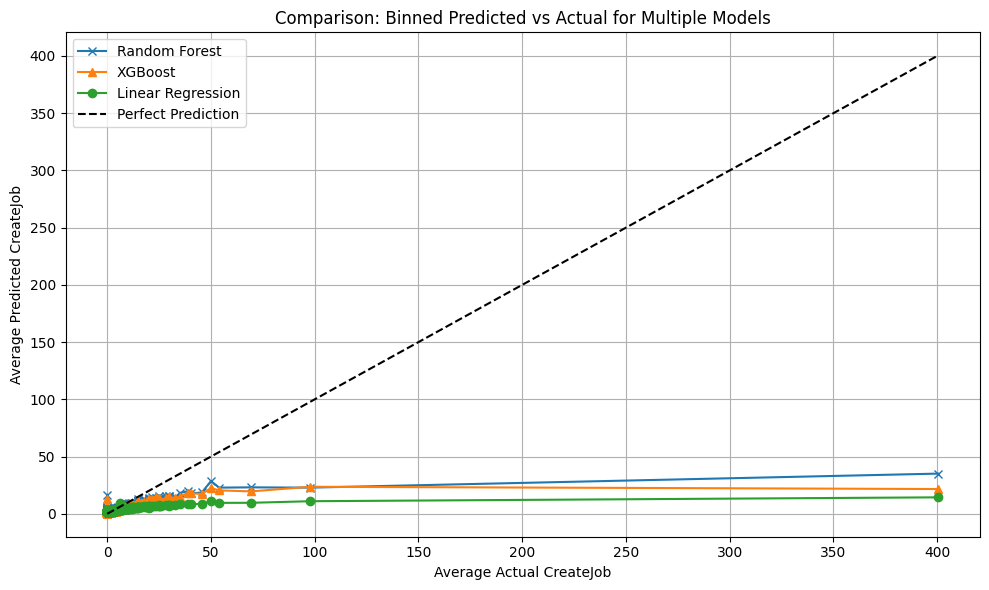

In [21]:
# Predictions for each model
y_test_pred_rf = rf_model.predict(X_test)      # Random Forest Regressor
y_test_pred_xgb = xgb_model.predict(X_test)    # XGBoost Regressor
y_test_pred_lin = lin_reg.predict(X_test)      # Linear Regression

# Store predictions in a DataFrame
df_plot_multi = pd.DataFrame({
    'Actual': y_test.values,
    'RandomForest': y_test_pred_rf,
    'XGBoost': y_test_pred_xgb,
    'LinearReg': y_test_pred_lin
})

# Sort and bin by actual values
df_plot_multi = df_plot_multi.sort_values(by='Actual').reset_index(drop=True)
df_plot_multi['bin'] = df_plot_multi.index // 100  # 100 observations per bin

# Group by bin and compute mean
df_binned_multi = df_plot_multi.groupby('bin').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_binned_multi['Actual'], df_binned_multi['RandomForest'], label='Random Forest', linestyle='-', marker='x')
plt.plot(df_binned_multi['Actual'], df_binned_multi['XGBoost'], label='XGBoost', linestyle='-', marker='^')
plt.plot(df_binned_multi['Actual'], df_binned_multi['LinearReg'], label='Linear Regression', linestyle='-', marker='o')
plt.plot(df_binned_multi['Actual'], df_binned_multi['Actual'], linestyle='--', color='black', label='Perfect Prediction')

# Labels and title
plt.xlabel('Average Actual CreateJob')
plt.ylabel('Average Predicted CreateJob')
plt.title('Comparison: Binned Predicted vs Actual for Multiple Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Binary Variables

### A. Predicting loan repayment status 

This section uses four models—Logistic Regression, Random Forest, XGBoost, and SVM—to predict whether a loan issued by banks and guaranteed by the SBA will be paid in full (1) or charged off (0). The target variable is MIS_Status_Binary, where 0 indicates a charged-off loan, and 1 indicates full repayment.

In [25]:
# Define independent variables (features)
features = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'ChgOffPrinGr', 'SBA_Appv', 
            'ChgOffDate_binary', 'UrbanRural_binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

# Define target variable
X = df[features]
y = df['MIS_Status_Binary']

# Split data into 70% train, 10% validation, 20% test
#first get 20% to be test data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#then split the train data further to have validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [26]:
#see the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 400632
Validation set size: 57234
Test set size: 114467


1. Logistic Regression as Baseline Model 

In [38]:
# Standardize the features (Logistic Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9977, Precision: 1.0000, Recall: 0.9903, F1: 0.9951
Validation Accuracy: 0.9975, Precision: 1.0000, Recall: 0.9898, F1: 0.9949
Test Accuracy: 0.9977, Precision: 1.0000, Recall: 0.9904, F1: 0.9952


2. Random Forest 

In [39]:
# Train Random Forest model with a different variable name
rf_model_MIS = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model_MIS.fit(X_train, y_train)  # Use unscaled X_train
# Predictions
y_train_pred = rf_model_MIS.predict(X_train)
y_val_pred = rf_model_MIS.predict(X_val)
y_test_pred = rf_model_MIS.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Validation Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9999, F1: 1.0000
Test Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9999, F1: 0.9999


3. XG Boost 

In [40]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=50, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9994, F1: 0.9997
Validation Accuracy: 0.9998, Precision: 0.9999, Recall: 0.9991, F1: 0.9995
Test Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9996, F1: 0.9997


4. Support Machine Vectors 

Out of the four models, SVM is the worst performer. It has a large MSE and a negative r-squared meaning that it is not the right model for this dataset. 

Logistic regression, Random Forest, and XGBoost all had small MSE, large r-squared, and accuracy clos to 100%. 

In [30]:
# Subsample 2% of the training data
X_train_sub3, _, y_train_sub3, _ = train_test_split(X_train, y_train, train_size=0.02, random_state=42, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_sub3_scaled = scaler.fit_transform(X_train_sub3)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train LinearSVC model with scaled data
svm_model = LinearSVC(max_iter=500, random_state=42)
svm_model.fit(X_train_sub3_scaled, y_train_sub3)

# Predictions on scaled data
y_train_pred = svm_model.predict(X_train_sub3_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train_sub3, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train_sub3, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train_sub3, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}, Accuracy: {train_acc:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}, Accuracy: {test_acc:.4f}")

Train MSE: 0.0065, R²: 0.9631, Accuracy: 0.9935
Validation MSE: 0.0071, R²: 0.9607, Accuracy: 0.9929
Test MSE: 0.0069, R²: 0.9617, Accuracy: 0.9931


In [31]:
#compare model performance 
# Create a dictionary of repayment results
results_repayment = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Linear SVM'],
    'Train MSE': [0.0070, 0.0016, 0.0070, 0.0065],
    'Train R²': [0.9611, 0.9912, 0.9613, 0.9631],
    'Train Accuracy': [0.9930, 0.9984, 0.9930, 0.9935],
    'Val MSE': [0.0071, 0.0074, 0.0071, 0.0071],
    'Val R²': [0.9608, 0.9587, 0.9608, 0.9607],
    'Val Accuracy': [0.9929, 0.9926, 0.9929, 0.9929],
    'Test MSE': [0.0068, 0.0071, 0.0069, 0.0069],
    'Test R²': [0.9618, 0.9602, 0.9617, 0.9617],
    'Test Accuracy': [0.9932, 0.9929, 0.9931, 0.9931]
}

# Convert to DataFrame
results_df_repayment = pd.DataFrame(results_repayment)

# Display it
results_df_repayment


,Model,Train MSE,Train R²,Train Accuracy,Val MSE,Val R²,Val Accuracy,Test MSE,Test R²,Test Accuracy
0,Logistic Regression,0.0070,0.9611,0.9930,0.0071,0.9608,0.9929,0.0068,0.9618,0.9932
1,Random Forest,0.0016,0.9912,0.9984,0.0074,0.9587,0.9926,0.0071,0.9602,0.9929
2,XGBoost,0.0070,0.9613,0.9930,0.0071,0.9608,0.9929,0.0069,0.9617,0.9931
3,Linear SVM,0.0065,0.9631,0.9935,0.0071,0.9607,0.9929,0.0069,0.9617,0.9931


### B. Loan Default Prediction

Predicting loan defaults can help financial institutions assess risks before issuing loans.

In [32]:
# Define independent variables (features)
features = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'ChgOffPrinGr', 'SBA_Appv', 'UrbanRural_binary', 'MIS_Status_Binary', 
            'IsFranchise', 'LowDoc_binary', 'RevLineCr_binary',
            'Sector_Accommodation & Food', 'Sector_Admin & Waste Mgmt',
            'Sector_Agriculture', 'Sector_Arts & Recreation', 'Sector_Construction',
            'Sector_Education', 'Sector_Finance', 'Sector_Healthcare',
            'Sector_Information', 'Sector_Management', 'Sector_Manufacturing',
            'Sector_Mining', 'Sector_Other Services', 'Sector_Professional Services',
            'Sector_Public Admin', 'Sector_Real Estate', 'Sector_Retail Trade',
            'Sector_Transportation', 'Sector_Unknown', 'Sector_Utilities',
            'Sector_Wholesale Trade']

# Define target variable
X = df[features]
y = df['ChgOffDate_binary']

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [33]:
#see the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 400632
Validation set size: 57234
Test set size: 114467


1. Logistic regression 

In [34]:
# Standardize the features (Logistic Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9977
Validation Accuracy: 0.9975
Test Accuracy: 0.9977


2. Random Forest 

In [35]:
# Train RandomForestClassifier model using the already split data
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)  # Use unscaled X_train

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Confusion Matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Validation Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9999, F1: 1.0000
Test Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9999, F1: 0.9999
Test Confusion Matrix:
[[86855     0]
 [    4 27608]]


3. XGBoost 

In [41]:
# Train XGBoost model (using already split data)
xgb_model = XGBClassifier(n_estimators=50, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Confusion Matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9994, F1: 0.9997
Validation Accuracy: 0.9998, Precision: 0.9999, Recall: 0.9991, F1: 0.9995
Test Accuracy: 0.9999, Precision: 0.9999, Recall: 0.9996, F1: 0.9997
Test Confusion Matrix:
[[86853     2]
 [   12 27600]]


4. SVM 

In [37]:
# Subsample 2% of the training data
X_train_sub4, _, y_train_sub4, _ = train_test_split(X_train, y_train, train_size=0.02, random_state=42, shuffle=True)

# Standardize features
scaler = StandardScaler()
X_train_sub4_scaled = scaler.fit_transform(X_train_sub4)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM model
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_sub4_scaled, y_train_sub4)

# Predictions
y_train_pred = svm_model.predict(X_train_sub4_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train_sub4, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_sub4, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_sub4, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train_sub4, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


Train Accuracy: 0.9960, Precision: 1.0000, Recall: 0.9829, F1: 0.9914
Validation Accuracy: 0.9960, Precision: 0.9999, Recall: 0.9837, F1: 0.9918
Test Accuracy: 0.9960, Precision: 0.9997, Recall: 0.9837, F1: 0.9916
